# Intenciones de Compradores Online
### La base de datos muestra el comportamiento de compradores online en diferentes paginas, clasificando los productos relacionados, los cambios de pagina, las frecuencias de salida y dias especiales, además de algunos datos administrativos y especificaciones de buscadores.

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'online_shoppers_intention.csv'
df = pd.read_csv(path)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

In [4]:
df.shape

(12330, 18)

In [5]:
df.isnull().any().any()

True

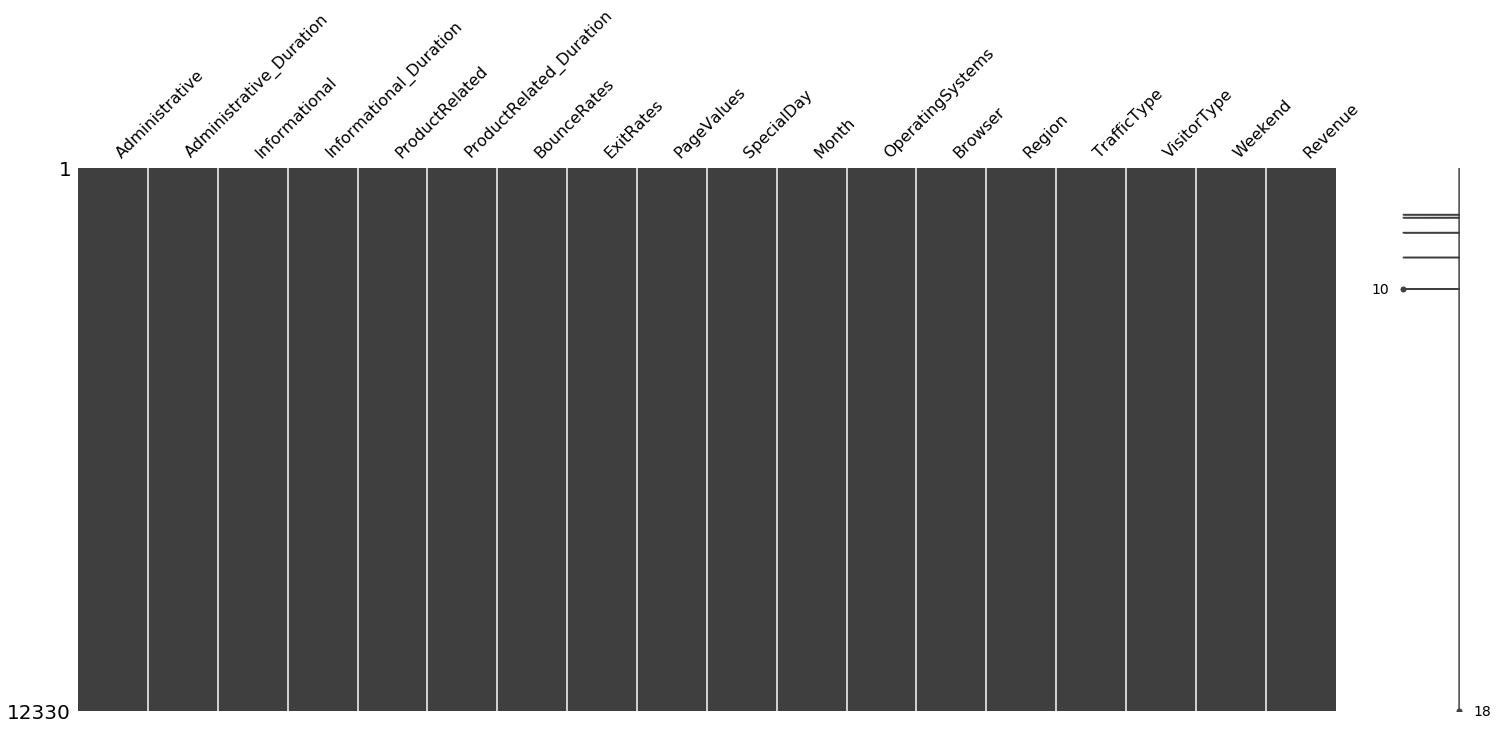

In [6]:
msno.matrix(df)

In [7]:
df.replace({' ': np.nan}, inplace=True)

In [14]:
df.isnull().any().any()

True

In [8]:
df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

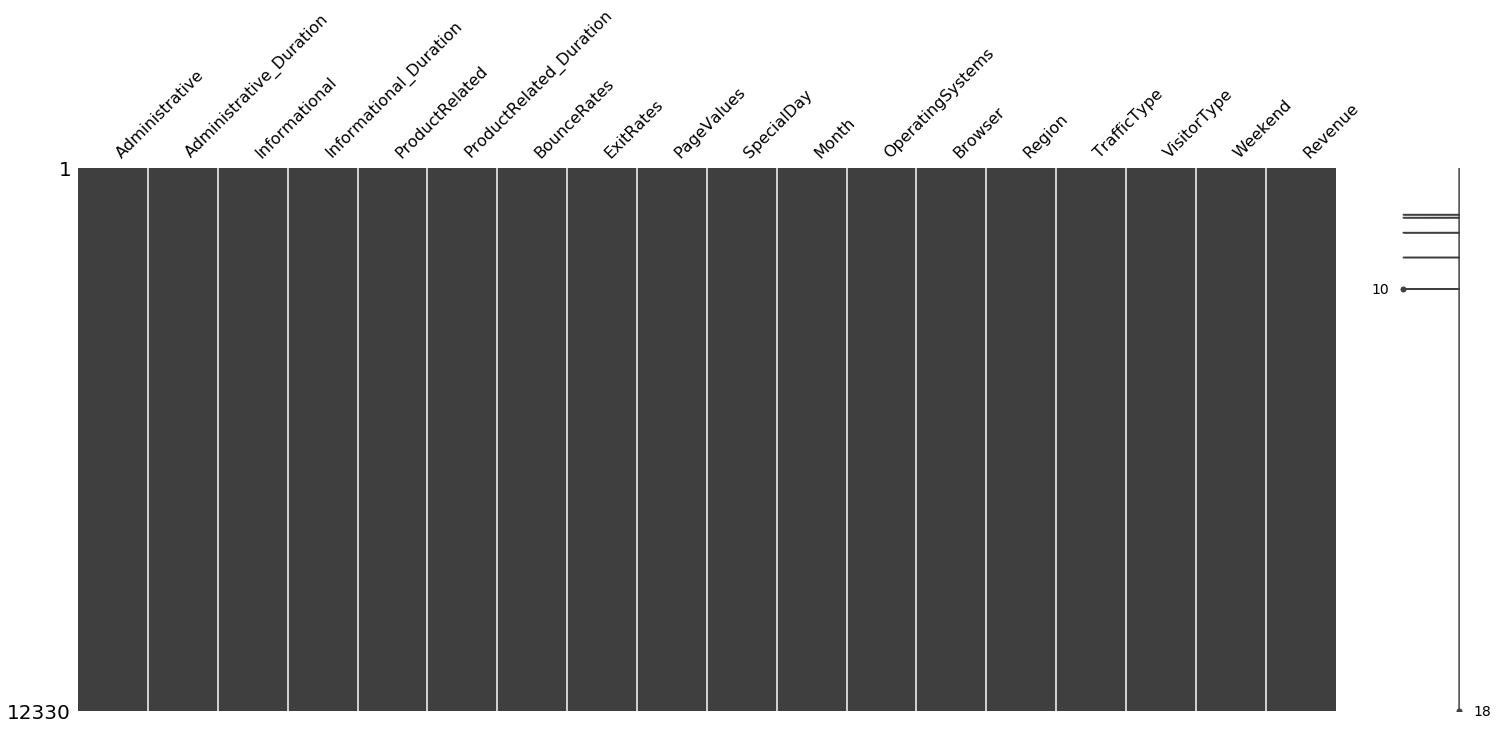

In [9]:
msno.matrix(df)

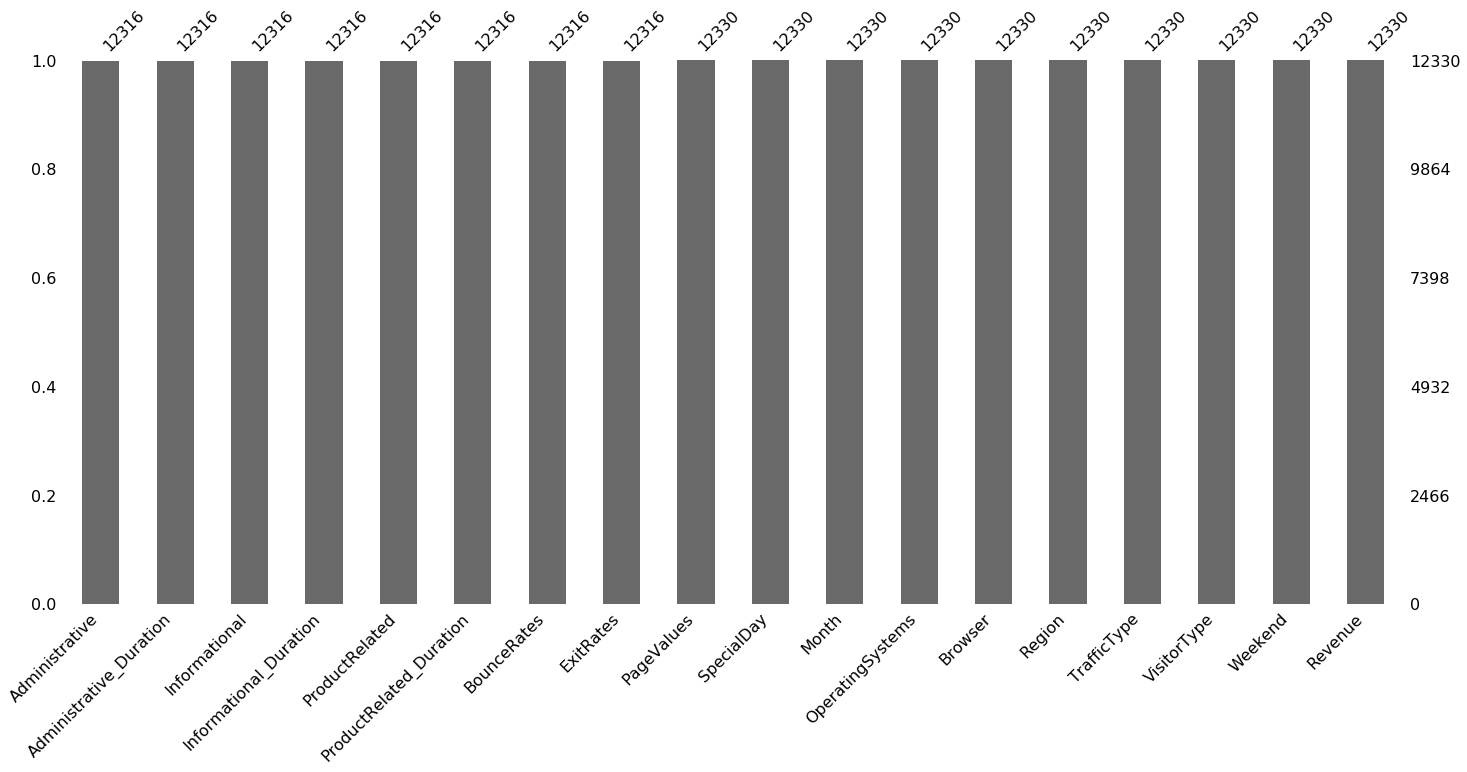

In [10]:
msno.bar(df)

In [11]:
df.columns[df.isnull().any()].tolist()

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates']

In [12]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [13]:
df.agg(['count', 'size', 'nunique'])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12316,12316,12316,12316,12316,12316,12316,12316,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330
size,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330
nunique,27,3336,17,1259,311,9552,1872,4777,2704,6,10,8,13,9,20,3,2,2


In [14]:
df=df.dropna()

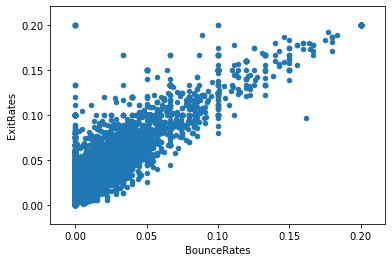

In [15]:
df.plot(kind='scatter',x='BounceRates',y='ExitRates')

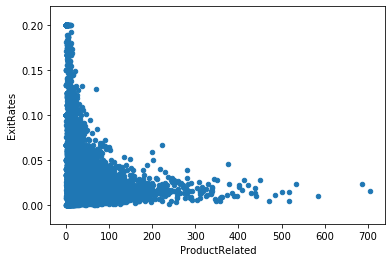

In [17]:
df.plot(kind='scatter',x='ProductRelated',y='ExitRates')

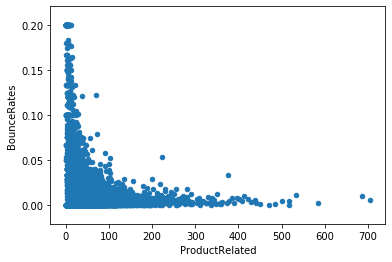

In [16]:
df.plot(kind='scatter',x='ProductRelated',y='BounceRates')

Text(0.5, 1.0, 'Frecuencia de Bounce Rates')

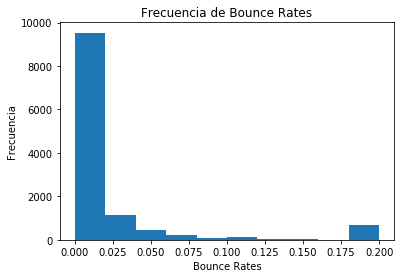

In [18]:
plt.hist(df['BounceRates'])
plt.xlabel('Bounce Rates')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Bounce Rates')

Text(0.5, 1.0, 'Frecuencia de Exit Rates')

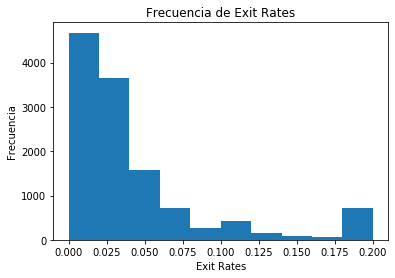

In [19]:
plt.hist(df['ExitRates'])
plt.xlabel('Exit Rates')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Exit Rates')

Text(0.5, 1.0, 'Frecuencia de Product Related')

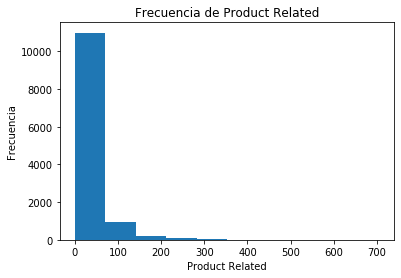

In [20]:
plt.hist(df['ProductRelated'])
plt.xlabel('Product Related')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Product Related')

Text(0.5, 1.0, 'Frecuencia de Tipo de Visitante')

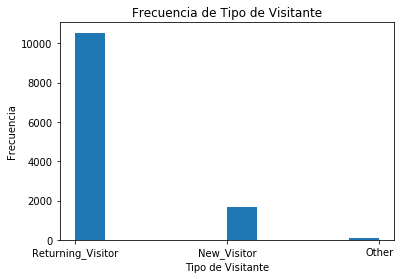

In [23]:
plt.hist(df['VisitorType'])
plt.xlabel('Tipo de Visitante')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Tipo de Visitante')

Text(0.5, 1.0, 'Frecuencia de Regiones')

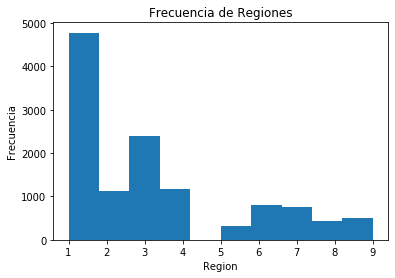

In [25]:
plt.hist(df['Region'])
plt.xlabel('Region')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Regiones')

Text(0.5, 1.0, 'Frecuencia de Dias Especiales')

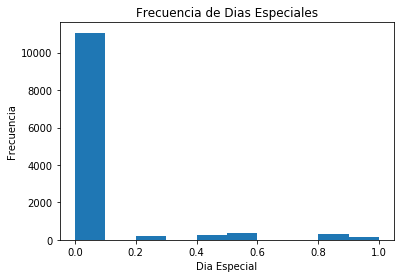

In [30]:
plt.hist(df['SpecialDay'])
plt.xlabel('Dia Especial')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Dias Especiales')

Text(0.5, 1.0, 'Box Plot de Bounce Rates')

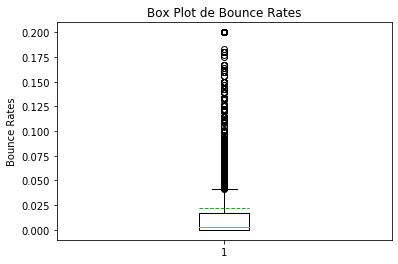

In [26]:
plt.boxplot(df['BounceRates'], showmeans=True, meanline=True)
plt.ylabel('Bounce Rates')
plt.title('Box Plot de Bounce Rates')

Text(0.5, 1.0, 'Box Plot de Exit Rates')

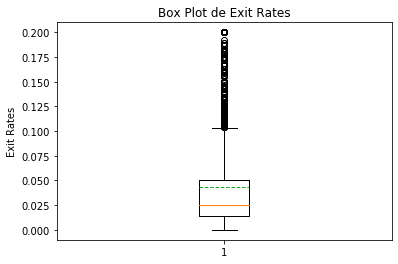

In [27]:
plt.boxplot(df['ExitRates'], showmeans=True, meanline=True)
plt.ylabel('Exit Rates')
plt.title('Box Plot de Exit Rates')

Text(0.5, 1.0, 'Box Plot de Product Related')

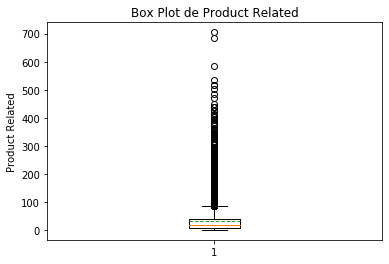

In [28]:
plt.boxplot(df['ProductRelated'], showmeans=True, meanline=True)
plt.ylabel('Product Related')
plt.title('Box Plot de Product Related')

Text(0.5, 1.0, 'Box Plot de Product Related Duration')

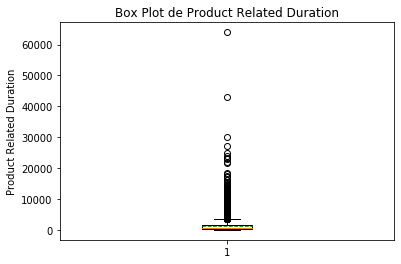

In [29]:
plt.boxplot(df['ProductRelated_Duration'], showmeans=True, meanline=True)
plt.ylabel('Product Related Duration')
plt.title('Box Plot de Product Related Duration')